# Capítulo 10: Modelos pre-entrenados y Trasferencia de aprendizaje

## VGGNET

In [1]:
from PIL import Image
# Convertir a escala de grises
img = Image.open("vgg.png").convert('L')
img.save('plot_grayscale.jpg', dpi=(300,300))

Tamaño de la imagen: (300, 300, 3)


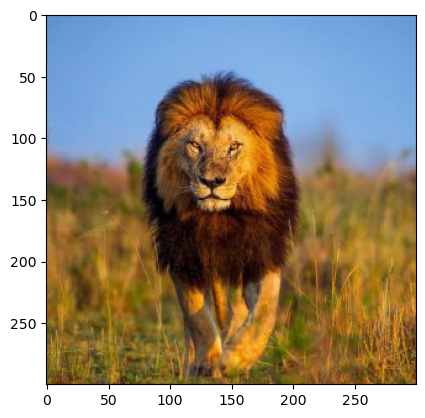

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

ruta_img = '../león.jpg'

img = mpimg.imread(ruta_img)
im = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

In [2]:
model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.preprocessing import image
img = image.load_img(ruta_img, target_size=(224, 224))

In [4]:
type(img)

PIL.Image.Image

In [5]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)

In [6]:
pred = model.predict(x)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(1, 1000)

In [7]:
etiquetas = keras.applications.vgg16.decode_predictions(pred, top=3)
print("Predicción", etiquetas[0])

Predicción [('n02129165', 'lion', 0.99981254), ('n02130308', 'cheetah', 0.00010588137), ('n02117135', 'hyena', 2.759753e-05)]


In [8]:
etiqueta_dec = etiquetas[0][0]
print('%s (%.2f%%)' % (etiqueta_dec[1], etiqueta_dec[2]*100 ))

lion (99.98%)


## Clasificación de imágenes de carros y motocicletas con CNN

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import shutil
import random

In [6]:
import zipfile
zip_ref = zipfile.ZipFile("../datasets/carros_motocicletas.zip", 'r')
zip_ref.extractall("../datasets/carros_motocicletas/")
zip_ref.close()

In [7]:
directorio_principal = '../datasets/carros_motocicletas/Car-Bike-Dataset/'
directorio_destino = '../datasets/carros_motocicletas/Car-Bike-Dataset/'
extensiones = ['.jpg','.jpeg', '.png']  # Extensiones de las imágenes
porc_separacion = 0.8  # Proporción de imágenes para entrenamiento

In [9]:
clases = []
# Crear carpetas para cada clase en el directorio de destino
for clase in os.listdir(directorio_principal):
    clases.append(clase)

In [11]:
for clase in clases:
    os.makedirs(os.path.join(directorio_destino, 'entrenamiento', clase), exist_ok=True)
    os.makedirs(os.path.join(directorio_destino, 'validación', clase), exist_ok=True)

In [12]:
# Dividir imágenes en conjuntos de entrenamiento y validación
for clase in clases:
      archivos = [archivo for archivo in os.listdir(os.path.join(directorio_principal, clase)) 
                  if os.path.splitext(archivo)[1] in extensiones]
      random.shuffle(archivos)
      indice_sep = int(len(archivos) * porc_separacion)

      for archivo in archivos[:indice_sep]:
           shutil.copy(os.path.join(directorio_principal, clase, archivo), 
                       os.path.join(directorio_destino, 'entrenamiento', clase, archivo))

      for archivo in archivos[indice_sep:]:
          shutil.copy(os.path.join(directorio_principal, clase, archivo), 
                      os.path.join(directorio_destino, 'validación', clase, archivo))

In [13]:
dir_ent_motos = os.path.join(directorio_destino, 'entrenamiento', clases[0])
dir_val_motos = os.path.join(directorio_destino, 'validación', clases[0])
dir_ent_carros = os.path.join(directorio_destino, 'entrenamiento', clases[1])
dir_val_carros = os.path.join(directorio_destino, 'validación', clases[1])

In [14]:
print('Total muestras de entrenamiento de carros:', len(os.listdir(dir_ent_carros)))
print('Total muestras de entrenamiento de motos:', len(os.listdir(dir_ent_motos)))
print('Total muestras de validación de carros:', len(os.listdir(dir_val_carros)))
print('Total muestras de validación de motos:', len(os.listdir(dir_val_motos)))

Total muestras de entrenamiento de carros: 1597
Total muestras de entrenamiento de motos: 1599
Total muestras de validación de carros: 400
Total muestras de validación de motos: 400


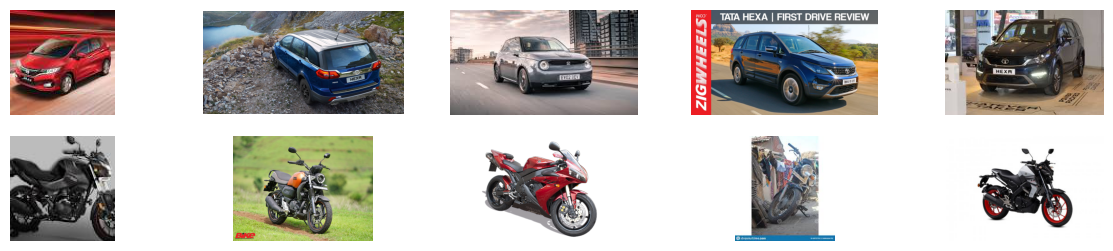

In [15]:
import matplotlib.image as mpimg
from PIL import Image

plt.figure(figsize=(15, 3))

imgs_carros = os.listdir(dir_ent_carros)[:5]
imgs_motos = os.listdir(dir_ent_motos)[:5]

imgs_carros = [os.path.join(dir_ent_carros, archivo) for archivo in imgs_carros[:5]]
imgs_bicicletas = [os.path.join(dir_ent_motos, archivo) for archivo in imgs_motos[:5]]

for i, ruta_img in enumerate(imgs_carros + imgs_bicicletas):
    sp = plt.subplot(2, 5, i + 1)
    sp.axis('Off') # no se muestran los ejes
    img = mpimg.imread(ruta_img)
    plt.imshow(img)
plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Input


# se configura la red
modelo = Sequential()
modelo.add(Input(shape=(300, 300, 3)))
modelo.add(Conv2D(32, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(256, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,943,873 (129.49 MB)

 Trainable params: 33,943,873 (129.49 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_datos_ent = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

gen_datos_pru  = ImageDataGenerator( rescale = 1.0/255. )


generador_ent = gen_datos_ent.flow_from_directory("../datasets/carros_motocicletas/Car-Bike-Dataset/entrenamiento",
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(300, 300))

generador_pru =  gen_datos_pru.flow_from_directory("../datasets/carros_motocicletas/Car-Bike-Dataset/validación",
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (300, 300))

Found 3196 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


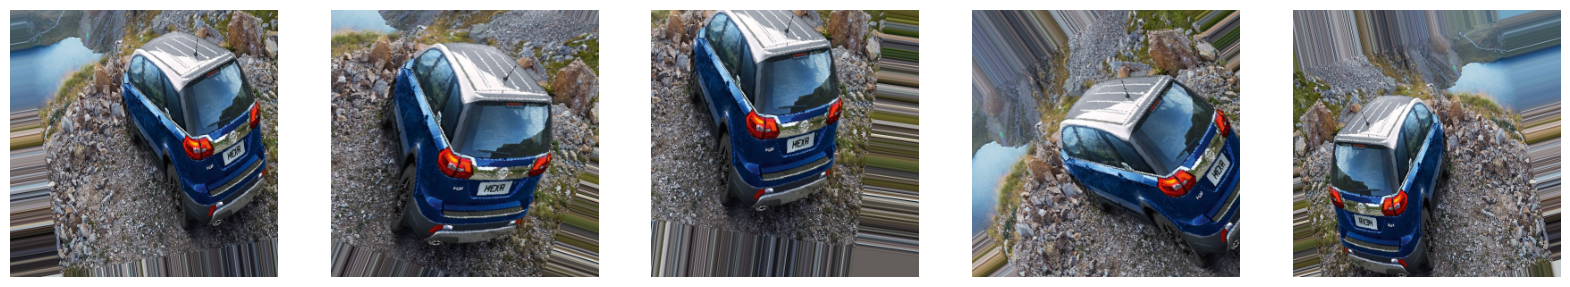

In [19]:
from keras.utils import load_img, img_to_array
ruta_img = imgs_carros[1]
img = load_img(ruta_img, target_size=(300, 300))

x = img_to_array(img)
x = x.reshape((1,) + x.shape)
gen = gen_datos_ent.flow(x, batch_size=1)

plt.figure(figsize=(20,10))
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(next(gen).squeeze())
    plt.plot()
plt.show()

In [20]:
from tensorflow.keras.optimizers import RMSprop

modelo.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [21]:
# Entrenar el modelo
historico = modelo.fit(
    generador_ent,
    steps_per_epoch=100,
    epochs=20
)

C:\Users\carlo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 56/100 ━━━━━━━━━━━━━━━━━━━━ 34s 787ms/step - acc: 0.5229 - loss: 0.7098 

C:\Users\carlo\anaconda3\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 816ms/step - acc: 0.5296 - loss: 0.6939
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 592ms/step - acc: 0.6050 - loss: 0.6611 
Epoch 3/20


C:\Users\carlo\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - acc: 0.6845 - loss: 0.6082   
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 611ms/step - acc: 0.6973 - loss: 0.5722 
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 957ms/step - acc: 0.7295 - loss: 0.5387 
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 550ms/step - acc: 0.7483 - loss: 0.5339 
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 943ms/step - acc: 0.7585 - loss: 0.5035 
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 548ms/step - acc: 0.7901 - loss: 0.4693 
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 920ms/step - acc: 0.7911 - loss: 0.4536 
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 814s 8s/step - acc: 0.8042 - loss: 0.4337   
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 868ms/step - acc: 0.8086 - loss: 0.4256 
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 484ms/step - acc: 0.8258 - loss: 0.4168 
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 825ms/step - acc: 0.8055 - loss: 0.4225 
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 534ms/step - acc: 0.8211 - 

In [22]:
perdida_prueba, exactitud_prueba= modelo.evaluate(generador_pru)
print ("Exactitud de Prueba: {:.2f}".format(exactitud_prueba))

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - acc: 0.9050 - loss: 0.2221 
Exactitud de Prueba: 0.90


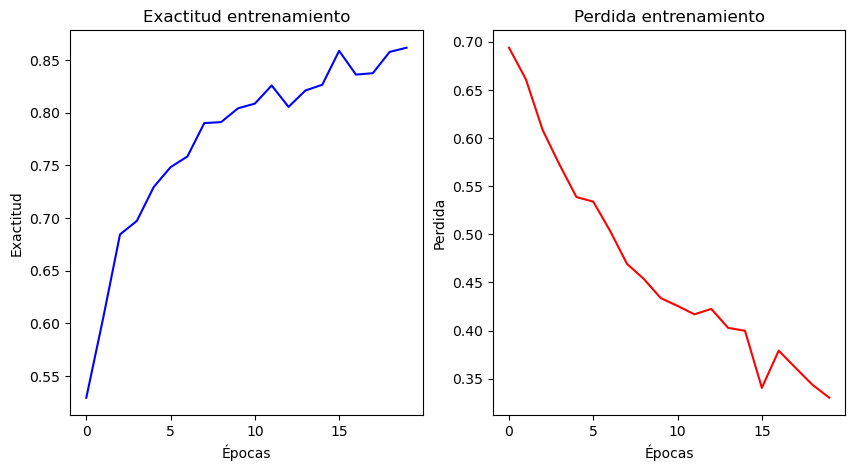

In [23]:
plt.figure(figsize=(10,5))
n = np.arange(0, 20)
plt.subplot(121)
plt.title('Exactitud entrenamiento')
plt.plot(n, historico.history['acc'],'b')
plt.xlabel("Épocas")
plt.ylabel("Exactitud")

plt.subplot(122)
plt.title('Perdida entrenamiento')
plt.plot(n, historico.history['loss'],'r')
plt.xlabel("Épocas")
plt.ylabel("Perdida")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Es una Motocicleta


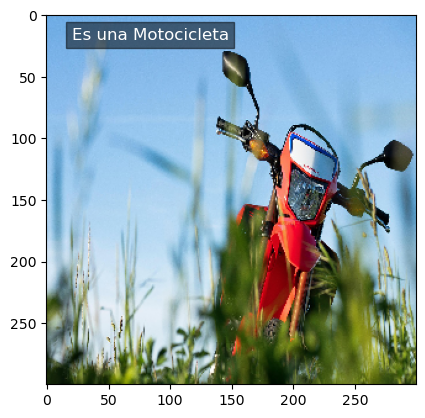

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image

ruta='../Imágenes/moto_prueba.jpg'
img=image.load_img(ruta, target_size=(300, 300))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)

clase = modelo.predict(image)
if clase == 1:
    prediccion = 'Es un Carro'
else:
    prediccion = 'Es una Motocicleta'
print(prediccion)

plt.text(20, 20, prediccion, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
plt.imshow(img)
plt.show()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                          patience=3,
                                         restore_best_weights=True)

historico = modelo.fit(
    generador_ent,
    steps_per_epoch=100,
    epochs=20,
    callbacks=[callback]
)

NameError: name 'tf' is not defined

In [ ]:
perdida_prueba, exactitud_prueba= modelo.evaluate(generador_pru)
print ("Exactitud de Prueba: {:.2f}".format(exactitud_prueba))

66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - acc: 0.9119 - loss: 0.1939
Exactitud de Prueba: 0.91


## Extracción de características

In [29]:
from tensorflow.keras.applications import VGG16

modelo_preentrenado = VGG16(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


In [30]:
for capa in modelo_preentrenado.layers:
  capa.trainable = False

modelo_preentrenado.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [31]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelEC = Sequential()
modelEC.add(modelo_preentrenado)
modelEC.add(Flatten())
modelEC.add(Dense(256, activation='relu'))
modelEC.add(Dense(1, activation='sigmoid'))
modelEC.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_datos_ent = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

gen_datos_pru  = ImageDataGenerator( rescale = 1.0/255. )

In [33]:
gen_ent = gen_datos_ent.flow_from_directory("../datasets/carros_motocicletas/Car-Bike-Dataset/entrenamiento",
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(224, 224))

gen_pru =  gen_datos_pru.flow_from_directory("../datasets/carros_motocicletas/Car-Bike-Dataset/validación",
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))

Found 3196 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [34]:
from tensorflow.keras.optimizers import RMSprop

modelEC.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

historico = modelEC.fit(
    gen_ent,
    steps_per_epoch=100,
    epochs=20
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - acc: 0.8537 - loss: 0.3336   
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 700ms/step - acc: 0.9342 - loss: 0.1639
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - acc: 0.9284 - loss: 0.1677
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 751ms/step - acc: 0.9500 - loss: 0.1341
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - acc: 0.9455 - loss: 0.1336
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 743ms/step - acc: 0.9599 - loss: 0.1036
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - acc: 0.9574 - loss: 0.1214
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 734ms/step - acc: 0.9517 - loss: 0.1201
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - acc: 0.9559 - loss: 0.1186
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 750ms/step - acc: 0.9600 - loss: 0.1031
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - acc: 0.9624 - loss: 0.1075
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 750ms/step - acc: 0.9617 - loss: 0.098

In [35]:
perdida_prueba, exactitud_prueba= modelEC.evaluate(gen_pru)
print ("Exactitud de Prueba: {:.2f}".format(exactitud_prueba))

40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 875ms/step - acc: 0.9900 - loss: 0.0316
Exactitud de Prueba: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


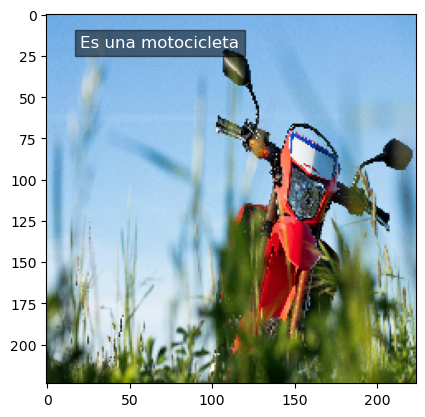

In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image

ruta='../Imágenes/moto_prueba.jpg'
img=image.load_img(ruta, target_size=(224, 224))
x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)

clase = modelEC.predict(image)
if clase == 1:
    prediccion = 'Es un Carro'
else:
    prediccion = 'Es una motocicleta'

plt.text(20, 20, prediccion, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
plt.imshow(img)
plt.show()

## Ajuste Fino

In [ ]:
from tensorflow.keras.applications import VGG16

modelo_preentrenado = VGG16(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

In [ ]:
modelo_preentrenado.trainable = True

In [ ]:
modeloAF = Sequential()
modeloAF.add(modelo_preentrenado)
modeloAF.add(Flatten())
modeloAF.add(Dense(256, activation='relu'))
modeloAF.add(Dense(1, activation='sigmoid'))
modeloAF.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 21,137,729 (80.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

modeloAF.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Realizar ajuste fino en las últimas 4 capas del modelo base
for capa in modeloAF.layers[0].layers[-4:]:
    capa.trainable = True

In [ ]:
# Entrenar el modelo
historico = modeloAF.fit(
    gen_ent,
    steps_per_epoch=100,
    epochs=20
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 418ms/step - acc: 0.5461 - loss: 0.8392
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 437ms/step - acc: 0.7836 - loss: 0.4664
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 424ms/step - acc: 0.8628 - loss: 0.3257
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 324ms/step - acc: 0.9159 - loss: 0.2011
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 421ms/step - acc: 0.9389 - loss: 0.1609
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - acc: 0.9369 - loss: 0.1766
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 420ms/step - acc: 0.9079 - loss: 0.2656
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 314ms/step - acc: 0.9454 - loss: 0.1412
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 441ms/step - acc: 0.9463 - loss: 0.1266
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - acc: 0.9540 - loss: 0.1403
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 432ms/step - acc: 0.9665 - loss: 0.1011
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - acc: 0.9655 - lo

In [ ]:
perdida_prueba, exactitud_prueba= modeloAF.evaluate(gen_pru)
print ("Exactitud de Prueba: {:.2f}".format(exactitud_prueba))

40/40 [==============================] - 213s 5s/step - loss: 0.1154 - acc: 0.9550
Exactitud de Prueba: 0.95
